# **Importing Library**

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

# **Loading DataSet**

In [150]:
ss = pd.read_csv('/content/drive/MyDrive/Job-A-Thon/sample_submission_znWiLZ4.csv')       # Sample Submission Dataset
train = pd.read_csv('/content/drive/MyDrive/Job-A-Thon/train_MpHjUjU.csv')                # Train Dataset
test = pd.read_csv('/content/drive/MyDrive/Job-A-Thon/test_hXY9mYw.csv')                  # Test Dataset

In [151]:
train.head()               # First 5 rows of the Dataset

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


## **Data Profiling**

In [152]:
train.dtypes                       # Data Types

MMM-YY                  object
Emp_ID                  int64 
Age                     int64 
Gender                  object
City                    object
Education_Level         object
Salary                  int64 
Dateofjoining           object
LastWorkingDate         object
Joining Designation     int64 
Designation             int64 
Total Business Value    int64 
Quarterly Rating        int64 
dtype: object

In [153]:
train.info()                 # info of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [154]:
train.shape, test.shape             # Shape of Training & Test Dataset

((19104, 13), (741, 1))

In [155]:
train.describe()                   # Deep information of the Dataset

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


# **Checking Missing Values**

In [156]:
import missingno as mo

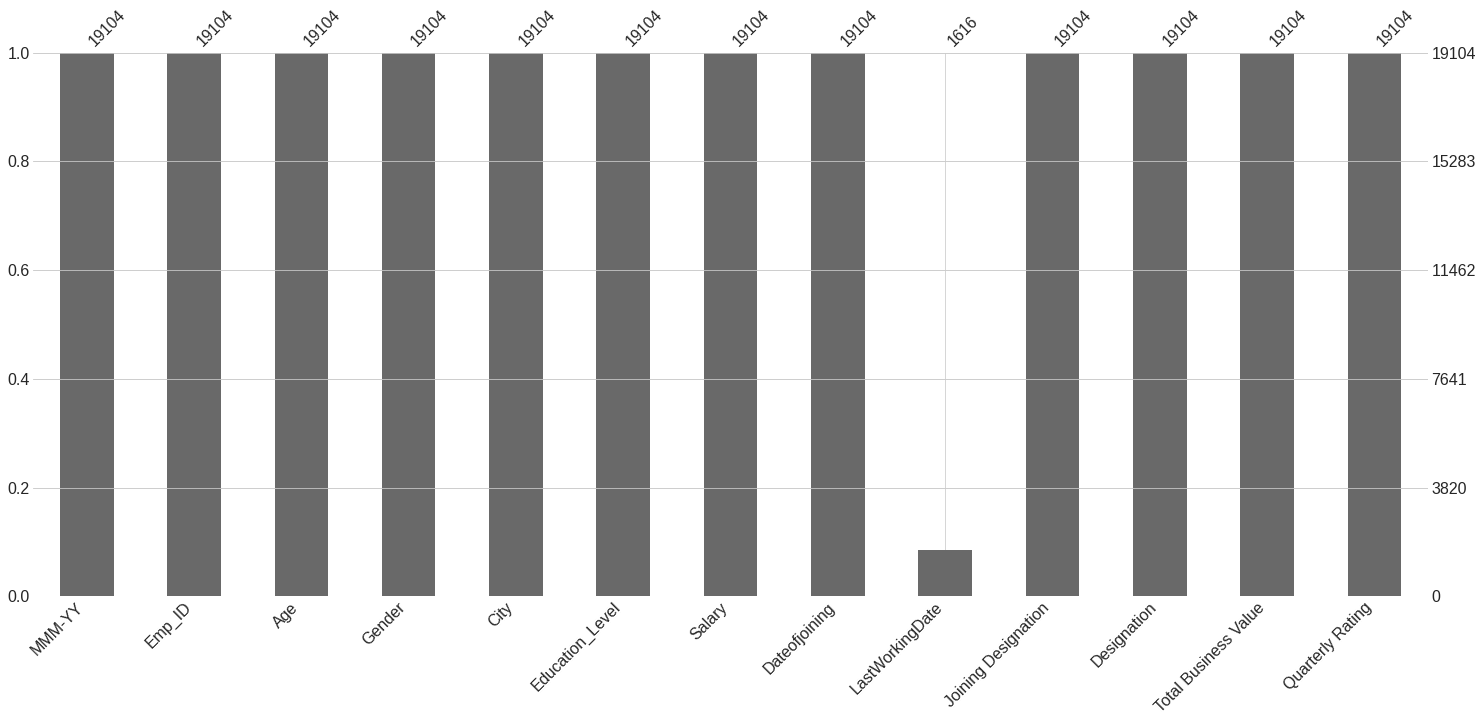

In [157]:
mo.bar(train) #Finding out missing value in dataset in graphical form using missingno library

In [158]:
train.isnull().sum()

MMM-YY                  0    
Emp_ID                  0    
Age                     0    
Gender                  0    
City                    0    
Education_Level         0    
Salary                  0    
Dateofjoining           0    
LastWorkingDate         17488
Joining Designation     0    
Designation             0    
Total Business Value    0    
Quarterly Rating        0    
dtype: int64

In [159]:
#Separating categorical and continuous columns from the dataset
cat=[]
con=[]
for i in train.columns:
    if(train[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [160]:
cat                         # Categorical Columns

['MMM-YY',
 'Gender',
 'City',
 'Education_Level',
 'Dateofjoining',
 'LastWorkingDate']

In [161]:
con                         # Continous columns

['Emp_ID',
 'Age',
 'Salary',
 'Joining Designation',
 'Designation',
 'Total Business Value',
 'Quarterly Rating']

In [162]:
train.nunique()         # Unique Values

MMM-YY                  24   
Emp_ID                  2381 
Age                     36   
Gender                  2    
City                    29   
Education_Level         3    
Salary                  2383 
Dateofjoining           869  
LastWorkingDate         493  
Joining Designation     5    
Designation             5    
Total Business Value    10181
Quarterly Rating        4    
dtype: int64

In [163]:
train["Emp_ID"].value_counts()          # Checking unique values in 'Emp_ID' (primary key)

2049    24
1191    24
1655    24
926     24
1623    24
        ..
1448    1 
748     1 
930     1 
962     1 
1194    1 
Name: Emp_ID, Length: 2381, dtype: int64

# **Checking Duplicate Values in Emp_ID column**

In [164]:
import collections               

In [165]:
duplicate_items = [item for item , count in collections.Counter(train.Emp_ID).items() if count>1]

In [166]:
len(duplicate_items)

2200

## **There are total 2200 dupicate values in the "Emp_ID" column**

In [167]:
train = train.drop_duplicates(subset=['Emp_ID'], keep='last')     # Droping the duplicate values

In [168]:
train                                                             # Data after droping duplicate values

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,505480,4
19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1
19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1
19096,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,0,1


In [169]:
train.reset_index(inplace= True)              # Reset th index

In [170]:
train

,index,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
1,4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
2,9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
3,12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1
4,17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,19078,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,505480,4
2377,19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1
2378,19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1
2379,19096,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,0,1


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 2381 non-null   int64 
 1   MMM-YY                2381 non-null   object
 2   Emp_ID                2381 non-null   int64 
 3   Age                   2381 non-null   int64 
 4   Gender                2381 non-null   object
 5   City                  2381 non-null   object
 6   Education_Level       2381 non-null   object
 7   Salary                2381 non-null   int64 
 8   Dateofjoining         2381 non-null   object
 9   LastWorkingDate       1616 non-null   object
 10  Joining Designation   2381 non-null   int64 
 11  Designation           2381 non-null   int64 
 12  Total Business Value  2381 non-null   int64 
 13  Quarterly Rating      2381 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 260.5+ KB


In [172]:
train.isnull().sum()

index                   0  
MMM-YY                  0  
Emp_ID                  0  
Age                     0  
Gender                  0  
City                    0  
Education_Level         0  
Salary                  0  
Dateofjoining           0  
LastWorkingDate         765
Joining Designation     0  
Designation             0  
Total Business Value    0  
Quarterly Rating        0  
dtype: int64

In [173]:
train['LastWorkingDate'] = train['LastWorkingDate'].fillna(0)            # Filling the Null values with 0

In [174]:
train

,index,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
1,4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,0,2,2,0,1
2,9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
3,12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1
4,17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,19078,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,0,2,3,505480,4
2377,19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1
2378,19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1
2379,19096,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,0,1


In [175]:
# Function to get Target variable
def LastWorkingDate_to_label(x):
  if(x == 0):
    return 0
  if(x != 0):
    return 1

In [176]:
# Applying Functions
train.LastWorkingDate = train.LastWorkingDate.apply(LastWorkingDate_to_label)          

In [177]:
train

,index,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,1,0,2
1,4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,0,2,2,0,1
2,9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,1,2,2,0,1
3,12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,1,1,1,0,1
4,17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,19078,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,0,2,3,505480,4
2377,19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,1,1,1,0,1
2378,19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,1,2,2,0,1
2379,19096,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,1,1,1,0,1


In [178]:
train.LastWorkingDate.value_counts()

1    1616
0    765 
Name: LastWorkingDate, dtype: int64

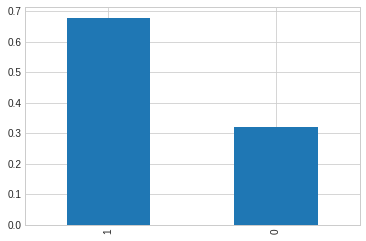

In [179]:
train['LastWorkingDate'].value_counts(normalize=True).plot(kind='bar')

# **EDA (Exploratory Data Analysis)**

In [180]:
#Count of observations in each category
n = ['Gender','City','Education_Level','Joining Designation','Designation','Quarterly Rating']

for i in n:
    print(train[i].value_counts())

Male      1404
Female    977 
Name: Gender, dtype: int64
C20    152
C15    101
C29    96 
C26    93 
C27    89 
C8     89 
C10    86 
C16    84 
C22    82 
C3     82 
C28    82 
C12    81 
C5     80 
C1     80 
C21    79 
C14    79 
C6     78 
C4     77 
C7     76 
C9     75 
C25    74 
C23    74 
C24    73 
C2     72 
C19    72 
C17    71 
C13    71 
C18    69 
C11    64 
Name: City, dtype: int64
Master      802
Bachelor    795
College     784
Name: Education_Level, dtype: int64
1    1026
2    815 
3    493 
4    36  
5    11  
Name: Joining Designation, dtype: int64
2    855
1    741
3    623
4    138
5    24 
Name: Designation, dtype: int64
1    1744
2    362 
3    168 
4    107 
Name: Quarterly Rating, dtype: int64


# **Univariate**

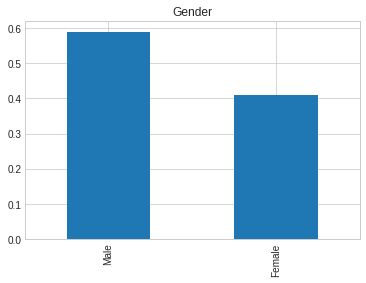

In [181]:
n = ['Gender','City','Education_Level','Joining Designation','Designation','Quarterly Rating']

train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

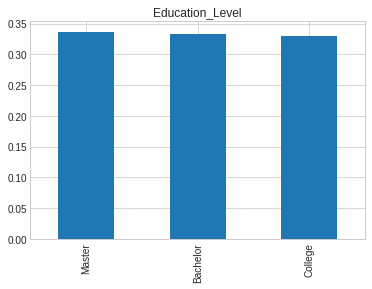

In [182]:
train['Education_Level'].value_counts(normalize=True).plot.bar(title='Education_Level')

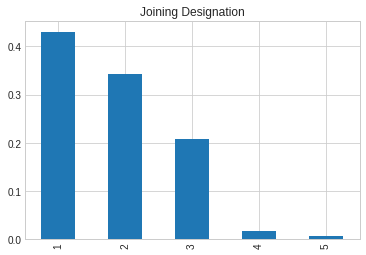

In [183]:
train['Joining Designation'].value_counts(normalize=True).plot.bar(title='Joining Designation')

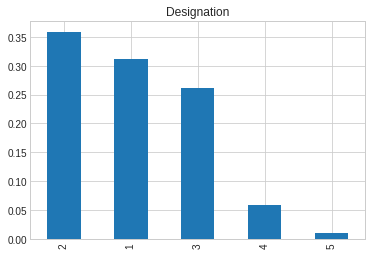

In [184]:
train['Designation'].value_counts(normalize=True).plot.bar(title='Designation')

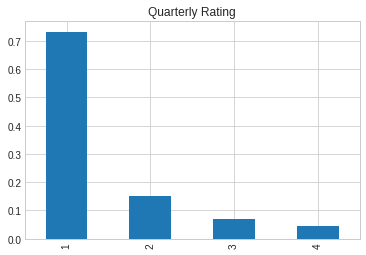

In [185]:
train['Quarterly Rating'].value_counts(normalize=True).plot.bar(title='Quarterly Rating')

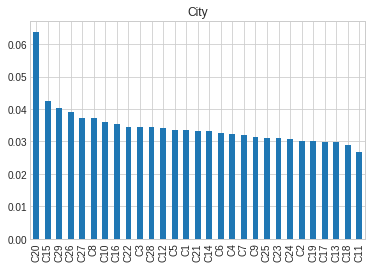

In [186]:
train['City'].value_counts(normalize=True).plot.bar(title='City')

# Continous Columns: Age, Monthly Income ,Total Business Value

Text(0.5, 1.0, 'Age')

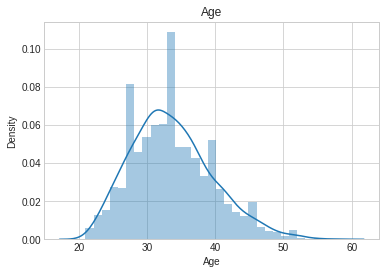

In [187]:
sns.distplot(train['Age'])
plt.title("Age")

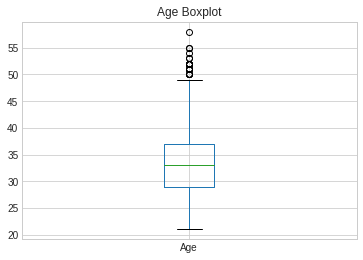

In [188]:
train['Age'].plot.box(title='Age Boxplot')

Text(0.5, 1.0, 'Salary')

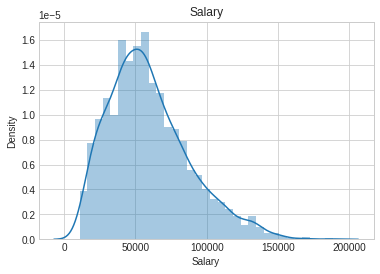

In [189]:
sns.distplot(train['Salary'])
plt.title("Salary")

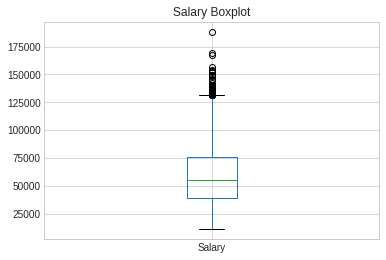

In [190]:
train['Salary'].plot.box(title='Salary Boxplot')

Text(0.5, 1.0, 'Total Business Value')

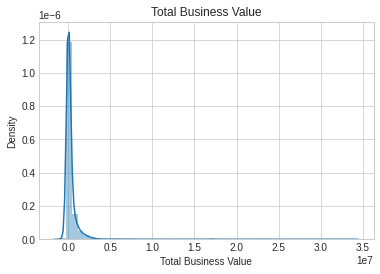

In [191]:
sns.distplot(train['Total Business Value'])
plt.title("Total Business Value")

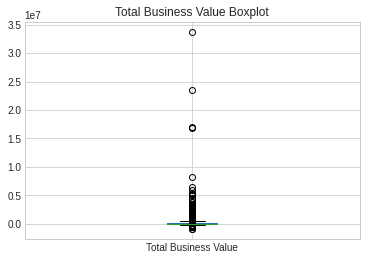

In [192]:
train['Total Business Value'].plot.box(title='Total Business Value Boxplot')

# **Bivariate**

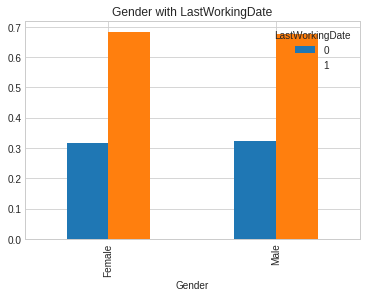

In [193]:
gender =pd.crosstab(train['Gender'],train['LastWorkingDate'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,title="Gender with LastWorkingDate")

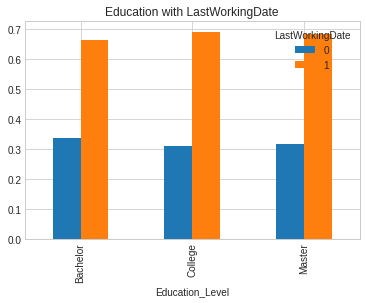

In [196]:
education = pd.crosstab(train['Education_Level'],train['LastWorkingDate'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',title="Education with LastWorkingDate")

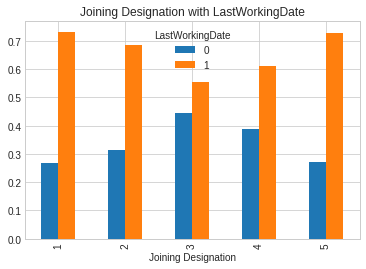

In [199]:
jde = pd.crosstab(train['Joining Designation'],train['LastWorkingDate'])
jde.div(jde.sum(1).astype(float),axis=0).plot(kind='bar',title="Joining Designation with LastWorkingDate")

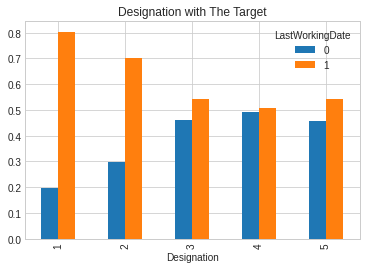

In [200]:
desig = pd.crosstab(train['Designation'],train['LastWorkingDate'])
desig.div(desig.sum(1).astype(float),axis=0).plot(kind='bar',title="Designation with The Target")

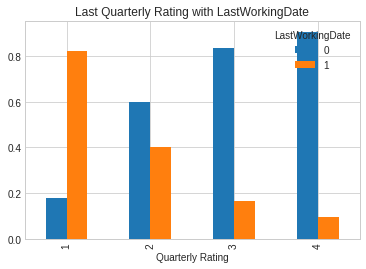

In [202]:
lqrate = pd.crosstab(train['Quarterly Rating'],train['LastWorkingDate'])
lqrate.div(lqrate.sum(1).astype(float),axis=0).plot(kind='bar',title="Last Quarterly Rating with LastWorkingDate")

#### We need to convert the MMM-YY,Dateofjoining,LastWorkingDate columns into datetime type.

In [203]:
##Converting 'MMM-YY', 'Dateofjoining', 'LastWorkingDate' feature to datetime type
train['MMM-YY'] = pd.to_datetime(train['MMM-YY'],format="%Y-%m-%d")                   

train['Dateofjoining'] = pd.to_datetime(train['Dateofjoining'],format="%Y-%m-%d")

train['LastWorkingDate'] = pd.to_datetime(train['LastWorkingDate'],format="%Y-%m-%d")

# **One hot Encoding**

In [ ]:
train.Gender = pd.get_dummies(train.Gender,drop_first=True)

In [ ]:
train

,index,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2,2016-03-01,1,28,1,C23,Master,57387,2015-12-24,1,1,1,0,2
1,4,2017-12-01,2,31,1,C7,Master,67016,2017-11-06,0,2,2,0,1
2,9,2017-04-01,4,43,1,C13,Master,65603,2016-12-07,1,2,2,0,1
3,12,2016-03-01,5,29,1,C9,College,46368,2016-01-09,1,1,1,0,1
4,17,2017-12-01,6,31,0,C11,Bachelor,78728,2017-07-31,0,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,19078,2017-12-01,2784,34,1,C24,College,82815,2012-10-15,0,2,3,505480,4
2377,19081,2017-10-01,2785,34,0,C9,College,12105,2017-08-28,1,1,1,0,1
2378,19090,2016-09-01,2786,45,1,C19,College,35370,2015-07-31,1,2,2,0,1
2379,19096,2016-06-01,2787,28,0,C20,Master,69498,2015-07-21,1,1,1,0,1


In [ ]:
train.Education_Level.value_counts()

Master      802
Bachelor    795
College     784
Name: Education_Level, dtype: int64

In [ ]:
train.Education_Level = pd.get_dummies(train.Education_Level)

In [ ]:
train

,index,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2,2016-03-01,1,28,1,C23,0,57387,2015-12-24,1,1,1,0,2
1,4,2017-12-01,2,31,1,C7,0,67016,2017-11-06,0,2,2,0,1
2,9,2017-04-01,4,43,1,C13,0,65603,2016-12-07,1,2,2,0,1
3,12,2016-03-01,5,29,1,C9,0,46368,2016-01-09,1,1,1,0,1
4,17,2017-12-01,6,31,0,C11,1,78728,2017-07-31,0,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,19078,2017-12-01,2784,34,1,C24,0,82815,2012-10-15,0,2,3,505480,4
2377,19081,2017-10-01,2785,34,0,C9,0,12105,2017-08-28,1,1,1,0,1
2378,19090,2016-09-01,2786,45,1,C19,0,35370,2015-07-31,1,2,2,0,1
2379,19096,2016-06-01,2787,28,0,C20,0,69498,2015-07-21,1,1,1,0,1


In [ ]:
train.isnull().sum()            # No null values

index                   0
MMM-YY                  0
Emp_ID                  0
Age                     0
Gender                  0
City                    0
Education_Level         0
Salary                  0
Dateofjoining           0
LastWorkingDate         0
Joining Designation     0
Designation             0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [ ]:
train.head(2)

,index,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2,2016-03-01,1,28,1,C23,0,57387,2015-12-24,1,1,1,0,2
1,4,2017-12-01,2,31,1,C7,0,67016,2017-11-06,0,2,2,0,1


In [ ]:
# Independent Variable
x = train[["Age","Gender", "Education_Level", "Salary", "Joining Designation", "Designation", "Total Business Value", "Quarterly Rating" ]]

# Dependent Variable
y = train[["LastWorkingDate"]]

# **Spliting into Train-Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 100)

In [ ]:
x.head(2)

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,28,1,0,57387,1,1,0,2
1,31,1,0,67016,2,2,0,1


# **Standardization**

In [ ]:
sc = StandardScaler()
x["Age"] = sc.fit_transform(x[["Age"]])
sc1 = StandardScaler()
x["Salary"] = sc1.fit_transform(x[["Salary"]])
sc2 = StandardScaler()
x["Total Business Value"] = sc1.fit_transform(x[["Total Business Value"]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 100)

# **Building Models**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=100,criterion='entropy')
tp={"max_depth":(2,10,1)}
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtc,tp,scoring="f1_score",cv=4)
cvmodel=cv.fit(x_train,y_train)
md=cvmodel.best_params_['max_depth']
dtc=DecisionTreeClassifier(random_state=100,criterion='entropy',max_depth=md)
model=dtc.fit(x_train,y_train)
pred=model.predict(x_test)
    

from sklearn.metrics import f1_score
print("F1_Score:%4f"%(accuracy_score(y_test,pred)))

F1_Score:0.828859


# Test Dataset

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Job-A-Thon/test_hXY9mYw.csv")

In [ ]:
test

,Emp_ID
0,394
1,173
2,1090
3,840
4,308
...,...
736,2134
737,2255
738,448
739,1644


In [ ]:
train.columns

Index(['index', 'MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [ ]:
test.columns

Index(['Emp_ID'], dtype='object')

In [ ]:
test_final = pd.merge(test, train)           # Merging test & train data into test dataset

In [ ]:
test_final.head(20)

,Emp_ID,index,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,2592,2017-12-01,34,0,C20,0,97722,2011-06-06,0,2,4,2701750,3
1,173,1177,2017-12-01,39,1,C28,0,56174,2011-06-13,0,1,3,706010,3
2,1090,7296,2017-12-01,39,1,C13,0,96750,2011-06-27,0,2,4,1518520,2
3,840,5638,2017-12-01,40,0,C8,0,88813,2011-07-11,0,1,4,1151820,2
4,308,1975,2017-12-01,32,1,C5,0,188418,2011-08-15,0,2,5,3772910,2
5,1864,12554,2017-12-01,34,0,C29,1,85688,2011-08-11,0,1,3,895380,3
6,1606,10766,2017-12-01,44,0,C12,1,99127,2011-08-22,0,1,3,652300,3
7,954,6413,2017-12-01,31,1,C13,0,43996,2011-08-29,0,1,2,511200,3
8,2422,16405,2017-12-01,48,1,C4,1,111507,2011-08-26,0,2,4,1943280,3
9,1841,12348,2017-12-01,33,1,C24,0,123565,2011-09-02,0,1,3,735010,2


# Same Pre-processing is repeated on Test Dataset for Same Datatypes

In [ ]:
test_final = test_final.drop(labels=["LastWorkingDate"], axis=1)            

In [ ]:
x_final_test = test_final[["Age","Gender", "Education_Level", "Salary", "Joining Designation", "Designation", "Total Business Value", "Quarterly Rating" ]]

In [ ]:
x_final_test.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Salary                  0
Joining Designation     0
Designation             0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [ ]:
x_final_test.head(10)

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,34,0,0,97722,2,4,2701750,3
1,39,1,0,56174,1,3,706010,3
2,39,1,0,96750,2,4,1518520,2
3,40,0,0,88813,1,4,1151820,2
4,32,1,0,188418,2,5,3772910,2
5,34,0,1,85688,1,3,895380,3
6,44,0,1,99127,1,3,652300,3
7,31,1,0,43996,1,2,511200,3
8,48,1,1,111507,2,4,1943280,3
9,33,1,0,123565,1,3,735010,2


In [ ]:
# StandardScalar Test Data
sc = StandardScaler()
x_final_test["Age"] = sc.fit_transform(x_final_test[["Age"]])
sc1 = StandardScaler()
x_final_test["Salary"] = sc1.fit_transform(x_final_test[["Salary"]])
sc2 = StandardScaler()
x_final_test["Total Business Value"] = sc1.fit_transform(x_final_test[["Total Business Value"]])

In [ ]:
x_final_test.head()

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,-0.058988,0,0,1.021806,2,4,1.008084,3
1,0.788109,1,0,-0.392129,1,3,-0.030619,3
2,0.788109,1,0,0.988727,2,4,0.392260,2
3,0.957528,0,0,0.718620,1,4,0.201407,2
4,-0.397827,1,0,4.108314,2,5,1.565580,2


In [ ]:
y_pred1 = model.predict(x_final_test)

In [ ]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [ ]:
submission = pd.DataFrame({"Emp_ID":test["Emp_ID"], "Target":y_pred1})

In [ ]:
submission.head(30)

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
5,1864,0
6,1606,0
7,954,1
8,2422,0
9,1841,0


In [ ]:
submission.to_csv("abc_submission.csv", index=False)